In [1]:
# Initialize a new VAME project
import functions_bondjango as bd
import functions_vame as fv
import paths
import vame
import random
import os
import shutil

In [2]:
# Manually define the config path if project has already been created
config = r"F:\VAME_projects\VAME_prey_2-Feb9-2021\config.yaml"

In [13]:
# get the file paths

# define the number of files to use
number_files = 500
# define the search string
search_string = 'rig:miniscope,result:succ'

# define the target model
target_model = 'video_experiment'
# get the queryset
files = bd.query_database(target_model, search_string)

# pick a random subset of number_files
files = random.sample(files, number_files)

# get the video paths in a list
video_paths = [el['avi_path'] for el in files]

# define the working directory
working_directory = paths.vame_path

In [14]:
print(files[0]['preproc_files'][0])

dlc_path = files[0]['avi_path']
dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')
print(dlc_path)

08_09_2020_16_03_39_miniscope_dg_200617_b_succ_preprocessing
J:\Drago Guggiana Nilo\Prey_capture\AnalyzedData\08_09_2020_16_03_39_miniscope_DG_200617_b_succ_preproc.hdf5


In [15]:
# initialize the project
config = vame.init_new_project(project='VAME_prey_2', videos=video_paths, working_directory=working_directory, videotype='.avi')

Created "F:\VAME_projects\VAME_prey_2-Feb10-2021\videos"
Created "F:\VAME_projects\VAME_prey_2-Feb10-2021\data"
Created "F:\VAME_projects\VAME_prey_2-Feb10-2021\results"
Created "F:\VAME_projects\VAME_prey_2-Feb10-2021\model"
Copying the videos 

A VAME project has been created. 

Next use vame.create_trainset(config) to split your data into a train and test set. 
Afterwards you can use vame.rnn_model() to train the model on your data.


In [16]:
# Align video trajectories

# get the project folder
project_folder, _ = os.path.split(config)

# for all the videos
for el in files:
    print(f'Current file: {el["slug"]}')
    
    # if there is no preprocessing file, skip and warn
    if len(el['preproc_files']) == 0:
        print('no preprocessing file found')
        continue
    # load the avi file path
    dlc_path = el['avi_path']
    # edit it for the preprocessing path
    dlc_path = dlc_path.replace('.avi', '_preproc.hdf5')
    dlc_path = dlc_path.replace('VideoExperiment', 'AnalyzedData')
    dlc_path = dlc_path.replace('VRExperiment', 'AnalyzedData')

    # define the cropping
    crop_size = (1, 1)
    # egocentrically align the data and save
    fv.run_alignment(dlc_path, project_folder, '.avi', crop_size)


Current file: 08_09_2020_16_03_39_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 516/516 [00:00<00:00, 16133.86it/s]

Current file: 08_08_2020_15_50_40_miniscope_dg_200701_a_succ_noncon
Current file: 08_13_2020_16_12_01_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 436/436 [00:00<00:00, 13644.69it/s]

Current file: 12_12_2019_15_08_15_miniscope_mm_191108_a_succ
Current file: 08_29_2020_16_42_06_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 189/189 [00:00<00:00, 17192.01it/s]


Current file: 08_31_2020_16_10_12_miniscope_dg_200701_a_succ
Current file: 09_04_2020_17_14_08_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_55_25_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 525/525 [00:00<00:00, 12812.66it/s]


Current file: 03_13_2020_14_00_19_miniscope_mm_200129_b_succ
Current file: 12_03_2019_15_24_04_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 408/408 [00:00<00:00, 15714.63it/s]


Current file: 12_06_2019_14_07_11_miniscope_mm_191105_a_succ_nomini
Current file: 12_12_2019_15_27_48_miniscope_mm_191108_a_succ
Current file: 12_10_2019_16_48_14_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 312/312 [00:00<00:00, 12478.41it/s]

Current file: 08_21_2020_16_33_02_miniscope_dg_200617_b_succ
Current file: 08_11_2020_16_10_57_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_06_13_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/1826 [00:00<?, ?it/s]

Current file: 08_11_2020_15_12_33_miniscope_dg_200701_a_succ
Current file: 11_11_2019_22_56_57_miniscope_dg_190806_a_succ_nofluo


Align frames:   0%|                                                                                                                                                                                                                                | 0/954 [00:00<?, ?it/s]

Current file: 12_10_2019_15_00_45_miniscope_mm_191108_a_succ
Current file: 08_06_2020_18_24_41_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 576/576 [00:00<00:00, 15578.23it/s]

Current file: 08_29_2020_15_58_33_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_57_16_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 339/339 [00:00<00:00, 16139.08it/s]

Current file: 08_08_2020_15_57_37_miniscope_dg_200617_b_succ
Current file: 03_11_2020_16_14_11_miniscope_mm_200129_a_succ
Current file: 08_13_2020_15_52_37_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 17881.68it/s]

Current file: 09_02_2020_16_45_55_miniscope_dg_200701_a_succ
Current file: 03_12_2020_16_30_37_miniscope_mm_200129_a_succ



Align frames:  91%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                  | 1406/1538 [00:00<00:00, 13928.84it/s]

Current file: 11_11_2019_23_30_06_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 729/729 [00:00<00:00, 12579.13it/s]

Current file: 12_07_2019_16_09_54_miniscope_mm_191105_a_succ_nomini
Current file: 11_12_2019_17_07_21_miniscope_dg_190810_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 14164.48it/s]


Current file: 08_12_2020_15_51_54_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_41_46_miniscope_dg_200617_b_succ
Current file: 08_09_2020_15_57_15_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 599/599 [00:00<00:00, 14263.26it/s]

Current file: 08_30_2020_15_40_53_miniscope_dg_200701_a_succ
Current file: 03_04_2020_16_18_47_miniscope_mm_200129_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 13817.75it/s]


Current file: 08_10_2020_16_44_58_miniscope_dg_200701_a_succ
Current file: 08_15_2020_16_02_16_miniscope_dg_200701_a_succ
Current file: 12_07_2019_15_11_16_miniscope_mm_191108_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/377 [00:00<?, ?it/s]

Current file: 12_07_2019_15_52_11_miniscope_mm_191108_a_succ
Current file: 08_09_2020_15_44_35_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 824/824 [00:00<00:00, 15262.79it/s]


Current file: 11_13_2019_18_04_22_miniscope_dg_190806_a_succ_nofluo
Current file: 12_10_2019_15_10_23_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 13902.30it/s]


Current file: 08_19_2020_16_27_02_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_16_21_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 178/178 [00:00<00:00, 13680.50it/s]


Current file: 09_05_2020_15_45_35_miniscope_dg_200701_a_succ_injured
Current file: 08_31_2020_16_05_52_miniscope_dg_200701_a_succ
Current file: 03_12_2020_16_32_46_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 705/705 [00:00<00:00, 14109.63it/s]


Current file: 03_02_2020_15_54_55_miniscope_mm_200129_a_succ
Current file: 08_29_2020_16_46_00_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/896 [00:00<?, ?it/s]

Current file: 08_11_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_44_42_miniscope_dg_200617_b_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1128/1128 [00:00<00:00, 14657.22it/s]


Current file: 08_06_2020_18_15_22_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_27_15_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 229/229 [00:00<00:00, 15280.40it/s]


Current file: 09_08_2020_15_23_32_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_34_42_miniscope_dg_200617_b_succ
Current file: 12_10_2019_15_19_56_miniscope_mm_191108_a_succ


Align frames:  73%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████                                                        | 1333/1820 [00:00<00:00, 13205.46it/s]

Current file: 12_04_2019_16_18_37_miniscope_mm_191108_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/348 [00:00<?, ?it/s]

Current file: 08_07_2020_16_01_27_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_50_02_miniscope_dg_200701_a_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1886/1886 [00:00<00:00, 14854.57it/s]

Current file: 12_03_2019_16_48_22_miniscope_mm_191108_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 11859.19it/s]


Current file: 08_31_2020_16_36_15_miniscope_dg_200617_b_succ
Current file: 03_10_2020_15_56_24_miniscope_mm_200129_a_succ
Current file: 08_17_2020_16_25_53_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 360/360 [00:00<00:00, 12422.76it/s]


Current file: 08_07_2020_16_16_35_miniscope_dg_200701_a_succ
Current file: 08_10_2020_17_27_54_miniscope_dg_200617_b_succ
Current file: 03_06_2020_16_17_02_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/241 [00:00<?, ?it/s]

Current file: 08_21_2020_15_32_26_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_39_45_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/2390 [00:00<?, ?it/s]

Current file: 11_14_2019_17_50_12_miniscope_dg_190810_a_succ_nomini
Current file: 12_06_2019_14_55_56_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 358/358 [00:00<00:00, 11940.27it/s]


Current file: 03_10_2020_16_17_45_miniscope_mm_200129_b_succ
Current file: 08_29_2020_16_33_45_miniscope_dg_200617_b_succ
Current file: 09_06_2020_15_14_12_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 16526.63it/s]


Current file: 08_15_2020_16_34_53_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_17_59_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_08_29_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/899 [00:00<?, ?it/s]

Current file: 09_01_2020_16_47_10_miniscope_dg_200617_b_succ
Current file: 03_04_2020_15_46_47_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 195/195 [00:00<00:00, 13937.41it/s]

Current file: 09_07_2020_15_29_47_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_13_51_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_54_07_miniscope_dg_200617_b_succ_nofluo



Align frames:   0%|                                                                                                                                                                                                                               | 0/1080 [00:00<?, ?it/s]

Current file: 03_11_2020_16_52_20_miniscope_mm_200129_b_succ
Current file: 11_14_2019_17_19_46_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 13785.77it/s]


Current file: 08_06_2020_18_42_09_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_35_54_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 383/383 [00:00<00:00, 17418.85it/s]


Current file: 03_12_2020_16_23_09_miniscope_mm_200129_a_succ
Current file: 08_14_2020_15_47_26_miniscope_dg_200617_b_succ_injured
Current file: 08_21_2020_15_39_23_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 247/247 [00:00<00:00, 13731.77it/s]


Current file: 08_29_2020_16_01_17_miniscope_dg_200701_a_succ
Current file: 08_08_2020_15_47_53_miniscope_dg_200701_a_succ
Current file: 08_09_2020_15_03_09_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 222/222 [00:00<00:00, 13883.25it/s]


Current file: 09_06_2020_15_05_22_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_55_43_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_18_17_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 15085.49it/s]

Current file: 12_12_2019_15_16_04_miniscope_mm_191108_a_succ
Current file: 08_10_2020_16_41_32_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_46_29_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 278/278 [00:00<00:00, 13244.77it/s]


Current file: 12_12_2019_15_00_56_miniscope_mm_191108_a_succ
Current file: 08_29_2020_16_12_42_miniscope_dg_200701_a_succ
Current file: 09_03_2020_15_57_43_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 137/137 [00:00<00:00, 11407.29it/s]


Current file: 08_16_2020_15_41_26_miniscope_dg_200701_a_succ_injured
Current file: 09_08_2020_15_43_03_miniscope_dg_200617_b_succ
Current file: 12_07_2019_15_15_49_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 294/294 [00:00<00:00, 12245.41it/s]


Current file: 09_05_2020_16_23_03_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_01_41_miniscope_dg_200701_a_succ
Current file: 11_12_2019_17_14_20_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 301/301 [00:00<00:00, 12057.09it/s]


Current file: 08_10_2020_17_20_19_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_24_08_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_26_47_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 335/335 [00:00<00:00, 11973.41it/s]


Current file: 12_12_2019_15_04_45_miniscope_mm_191108_a_succ
Current file: 08_19_2020_16_33_11_miniscope_dg_200617_b_succ_injured
Current file: 08_13_2020_15_45_14_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 208/208 [00:00<00:00, 11564.51it/s]


Current file: 08_21_2020_16_24_35_miniscope_dg_200617_b_succ
Current file: 08_21_2020_15_45_14_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_32_34_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 18424.47it/s]


Current file: 08_21_2020_15_42_56_miniscope_dg_200701_a_succ
Current file: 08_21_2020_16_08_48_miniscope_dg_200617_b_succ
Current file: 08_13_2020_16_09_18_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 251/251 [00:00<00:00, 17936.90it/s]

Current file: 08_08_2020_16_29_56_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_12_08_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_40_35_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 14159.81it/s]


Current file: 12_06_2019_14_15_39_miniscope_mm_191105_a_succ_nomini
Current file: 03_06_2020_16_25_04_miniscope_mm_200129_b_succ
Current file: 12_09_2019_17_04_36_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/131 [00:00<?, ?it/s]

Current file: 08_06_2020_18_30_31_miniscope_dg_200617_b_succ
Current file: 09_04_2020_16_49_06_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 231/231 [00:00<00:00, 14445.44it/s]


Current file: 09_08_2020_15_20_34_miniscope_dg_200701_a_succ
Current file: 12_10_2019_16_57_26_miniscope_mm_191107_a_succ_nomini
Current file: 08_20_2020_15_48_39_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 17477.93it/s]


Current file: 09_05_2020_16_12_58_miniscope_dg_200617_b_succ
Current file: 09_05_2020_15_59_18_miniscope_dg_200701_a_succ
Current file: 08_13_2020_15_42_16_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 199/199 [00:00<00:00, 12430.07it/s]


Current file: 08_14_2020_15_37_49_miniscope_dg_200617_b_succ_injured
Current file: 09_03_2020_16_24_34_miniscope_dg_200617_b_succ
Current file: 09_05_2020_16_09_14_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 328/328 [00:00<00:00, 16408.43it/s]


Current file: 12_07_2019_16_38_08_miniscope_mm_191107_a_succ_nomini
Current file: 08_13_2020_15_55_14_miniscope_dg_200701_a_succ
Current file: 03_02_2020_16_29_48_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 166/166 [00:00<00:00, 11867.50it/s]


Current file: 09_08_2020_15_32_30_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_38_41_miniscope_dg_200617_b_succ
Current file: 09_04_2020_16_33_29_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 293/293 [00:00<00:00, 13328.97it/s]


Current file: 08_09_2020_16_13_20_miniscope_dg_200617_b_succ
Current file: 08_10_2020_16_52_15_miniscope_dg_200701_a_succ
Current file: 08_19_2020_15_58_22_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 293/293 [00:00<00:00, 13323.48it/s]

Current file: 08_06_2020_18_02_17_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_29_25_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 711/711 [00:00<00:00, 16537.64it/s]

Current file: 08_07_2020_16_52_22_miniscope_dg_200617_b_succ
Current file: 11_14_2019_17_30_44_miniscope_dg_190806_a_succ_nofluo



Align frames:   0%|                                                                                                                                                                                                                                | 0/508 [00:00<?, ?it/s]

Current file: 12_09_2019_15_12_24_miniscope_mm_191108_a_succ
Current file: 08_17_2020_15_40_54_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 206/206 [00:00<00:00, 13741.54it/s]


Current file: 09_04_2020_16_35_52_miniscope_dg_200701_a_succ
Current file: 08_16_2020_15_56_30_miniscope_dg_200701_a_succ
Current file: 08_10_2020_16_34_57_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 253/253 [00:00<00:00, 12659.67it/s]


Current file: 08_30_2020_16_17_16_miniscope_dg_200617_b_succ
Current file: 09_01_2020_15_59_31_miniscope_dg_200701_a_succ
Current file: 12_03_2019_15_47_19_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                               | 0/4055 [00:00<?, ?it/s]

Current file: 12_02_2019_17_08_58_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 15982.11it/s]


Current file: 03_12_2020_16_52_33_miniscope_mm_200129_b_succ
Current file: 09_06_2020_15_11_37_miniscope_dg_200701_a_succ
Current file: 09_02_2020_16_41_25_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 392/392 [00:00<00:00, 13066.99it/s]


Current file: 09_01_2020_16_10_27_miniscope_dg_200701_a_succ
Current file: 08_29_2020_15_55_24_miniscope_dg_200701_a_succ
Current file: 08_08_2020_16_18_51_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 17158.71it/s]


Current file: 08_16_2020_15_52_46_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_15_09_miniscope_dg_200701_a_succ
Current file: 03_06_2020_15_49_03_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1657 [00:00<?, ?it/s]

Current file: 08_11_2020_15_31_17_miniscope_dg_200701_a_succ_injured
Current file: 12_02_2019_17_26_56_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/190 [00:00<?, ?it/s]

Current file: 03_04_2020_15_42_07_miniscope_mm_200129_a_succ
Current file: 08_31_2020_15_59_34_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 396/396 [00:00<00:00, 13209.57it/s]


Current file: 08_11_2020_16_03_21_miniscope_dg_200617_b_succ
Current file: 12_11_2019_16_53_36_miniscope_mm_191108_a_succ
Current file: 08_11_2020_15_51_51_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 373/373 [00:00<00:00, 15550.36it/s]


Current file: 08_17_2020_16_06_06_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_06_26_miniscope_dg_200701_a_succ
Current file: 03_02_2020_15_35_18_miniscope_mm_200129_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 364/364 [00:00<00:00, 12560.79it/s]

Current file: 12_09_2019_15_25_14_miniscope_mm_191108_a_succ
Current file: 08_17_2020_16_01_03_miniscope_dg_200617_b_succ
Current file: 12_02_2019_17_18_30_miniscope_mm_191107_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 405/405 [00:00<00:00, 13509.03it/s]


Current file: 08_16_2020_16_04_28_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_44_52_miniscope_dg_200617_b_succ
Current file: 03_11_2020_16_10_08_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 379/379 [00:00<00:00, 14035.70it/s]


Current file: 03_11_2020_16_47_49_miniscope_mm_200129_b_succ
Current file: 03_13_2020_13_53_47_miniscope_mm_200129_b_succ
Current file: 09_03_2020_16_31_10_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 175/175 [00:00<00:00, 15920.25it/s]

Current file: 08_07_2020_16_08_55_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_23_32_miniscope_dg_200617_b_succ



Align frames:  67%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▎                                                                    | 1577/2348 [00:00<00:00, 15619.75it/s]

Current file: 12_02_2019_17_33_47_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/676 [00:00<?, ?it/s]

Current file: 09_04_2020_17_23_03_miniscope_dg_200617_b_succ
Current file: 08_20_2020_15_57_27_miniscope_dg_200701_a_succ_grabbedcable


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 374/374 [00:00<00:00, 14955.95it/s]


Current file: 08_30_2020_16_28_07_miniscope_dg_200617_b_succ
Current file: 03_10_2020_16_21_31_miniscope_mm_200129_b_succ
Current file: 12_06_2019_15_18_15_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 289/289 [00:00<00:00, 12572.91it/s]

Current file: 03_06_2020_16_20_40_miniscope_mm_200129_b_succ
Current file: 12_10_2019_15_15_08_miniscope_mm_191108_a_succ
Current file: 08_16_2020_16_15_42_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 221/221 [00:00<00:00, 12269.57it/s]


Current file: 09_02_2020_17_32_19_miniscope_dg_200617_b_succ
Current file: 08_17_2020_15_38_44_miniscope_dg_200701_a_succ
Current file: 03_06_2020_16_00_37_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 241/241 [00:00<00:00, 16076.26it/s]


Current file: 09_03_2020_16_21_39_miniscope_dg_200617_b_succ
Current file: 08_31_2020_15_46_43_miniscope_dg_200701_a_succ
Current file: 09_02_2020_17_21_30_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 333/333 [00:00<00:00, 12332.48it/s]


Current file: 09_06_2020_15_28_50_miniscope_dg_200617_b_succ
Current file: 08_31_2020_16_22_19_miniscope_dg_200617_b_succ
Current file: 09_07_2020_15_32_36_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 345/345 [00:00<00:00, 13806.00it/s]


Current file: 09_01_2020_16_39_52_miniscope_dg_200617_b_succ_injured
Current file: 12_09_2019_15_08_33_miniscope_mm_191108_a_succ
Current file: 08_20_2020_16_31_59_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 14367.48it/s]


Current file: 08_15_2020_15_52_25_miniscope_dg_200701_a_succ
Current file: 08_05_2020_15_55_12_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 617/617 [00:00<00:00, 13426.61it/s]


Current file: 08_08_2020_16_00_22_miniscope_dg_200617_b_succ
Current file: 12_06_2019_15_13_44_miniscope_mm_191107_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 156/156 [00:00<00:00, 17343.78it/s]


Current file: 12_10_2019_15_30_07_miniscope_mm_191108_a_succ
Current file: 09_07_2020_14_57_17_miniscope_dg_200701_a_succ
Current file: 08_09_2020_16_17_40_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 12372.73it/s]


Current file: 08_19_2020_15_55_28_miniscope_dg_200701_a_succ_injured
Current file: 09_03_2020_15_54_14_miniscope_dg_200701_a_succ
Current file: 08_20_2020_15_51_33_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1197 [00:00<?, ?it/s]

Current file: 12_09_2019_16_30_00_miniscope_mm_191105_a_succ_nomini
Current file: 11_12_2019_17_02_59_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1623/1623 [00:00<00:00, 14496.84it/s]

Current file: 11_13_2019_18_14_36_miniscope_dg_190810_a_succ_nomini
Current file: 12_09_2019_15_04_06_miniscope_mm_191108_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 235/235 [00:00<00:00, 15675.28it/s]


Current file: 08_18_2020_16_28_42_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_03_24_miniscope_dg_200701_a_succ
Current file: 08_14_2020_15_28_27_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1850 [00:00<?, ?it/s]

Current file: 09_06_2020_15_31_55_miniscope_dg_200617_b_succ
Current file: 08_08_2020_15_38_09_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 386/386 [00:00<00:00, 14305.54it/s]


Current file: 09_01_2020_16_58_35_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_23_43_miniscope_dg_200701_a_succ
Current file: 08_05_2020_16_20_09_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 207/207 [00:00<00:00, 17266.35it/s]


Current file: 08_30_2020_15_47_33_miniscope_dg_200701_a_succ_injured
Current file: 08_31_2020_16_29_59_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_15_16_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1124 [00:00<?, ?it/s]

Current file: 08_14_2020_15_40_19_miniscope_dg_200617_b_succ
Current file: 03_05_2020_15_59_48_miniscope_mm_200129_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/3828 [00:00<?, ?it/s]

Current file: 12_03_2019_15_08_15_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 13797.23it/s]


Current file: 12_04_2019_15_56_34_miniscope_mm_191107_a_succ_nomini
Current file: 09_07_2020_15_35_51_miniscope_dg_200617_b_succ
Current file: 08_19_2020_16_52_39_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 160/160 [00:00<00:00, 11434.66it/s]


Current file: 08_17_2020_15_43_31_miniscope_dg_200701_a_succ
Current file: 08_31_2020_16_42_25_miniscope_dg_200617_b_succ_injured
Current file: 08_07_2020_17_03_26_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/401 [00:00<?, ?it/s]

Current file: 12_07_2019_15_24_53_miniscope_mm_191108_a_succ
Current file: 08_06_2020_18_53_34_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 17134.12it/s]

Current file: 08_17_2020_16_10_15_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_24_54_miniscope_dg_200617_b_succ
Current file: 08_17_2020_16_12_24_miniscope_dg_200617_b_succ



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1273/1273 [00:00<00:00, 13841.94it/s]

Current file: 03_13_2020_13_14_07_miniscope_mm_200129_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 16913.32it/s]


Current file: 08_12_2020_15_32_21_miniscope_dg_200701_a_succ_injured
Current file: 03_05_2020_15_46_40_miniscope_mm_200129_a_succ
Current file: 12_03_2019_16_11_31_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 279/279 [00:00<00:00, 16419.63it/s]


Current file: 08_18_2020_16_04_51_miniscope_dg_200701_a_succ
Current file: 08_16_2020_16_13_04_miniscope_dg_200617_b_succ
Current file: 08_15_2020_15_54_28_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/493 [00:00<?, ?it/s]

Current file: 09_06_2020_15_47_33_miniscope_dg_200617_b_succ_injured
Current file: 03_04_2020_16_16_18_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 11136.44it/s]


Current file: 08_16_2020_16_09_31_miniscope_dg_200617_b_succ
Current file: 08_30_2020_16_10_58_miniscope_dg_200617_b_succ_injured
Current file: 12_03_2019_15_15_55_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 240/240 [00:00<00:00, 18474.74it/s]


Current file: 08_10_2020_17_33_00_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_35_23_miniscope_dg_200617_b_succ
Current file: 03_13_2020_13_49_34_miniscope_mm_200129_b_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1203/1203 [00:00<00:00, 14164.10it/s]


Current file: 08_05_2020_15_43_21_miniscope_dg_200701_a_succ
Current file: 08_19_2020_16_05_59_miniscope_dg_200701_a_succ_grabbedcable


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 227/227 [00:00<00:00, 16231.22it/s]

Current file: 12_03_2019_15_52_44_miniscope_mm_191107_a_succ_nomini
Current file: 09_05_2020_15_56_40_miniscope_dg_200701_a_succ
Current file: 12_09_2019_16_34_39_miniscope_mm_191105_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 487/487 [00:00<00:00, 13535.30it/s]


Current file: 12_07_2019_15_20_56_miniscope_mm_191108_a_succ
Current file: 08_06_2020_17_58_44_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 11929.12it/s]

Current file: 12_11_2019_17_05_25_miniscope_mm_191108_a_succ
Current file: 08_10_2020_17_07_51_miniscope_dg_200617_b_succ_injured



Align frames:   0%|                                                                                                                                                                                                                                | 0/301 [00:00<?, ?it/s]

Current file: 08_09_2020_14_55_56_miniscope_dg_200701_a_succ
Current file: 08_21_2020_16_12_47_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 395/395 [00:00<00:00, 17186.20it/s]

Current file: 09_03_2020_15_59_43_miniscope_dg_200701_a_succ
Current file: 08_07_2020_16_13_27_miniscope_dg_200701_a_succ
Current file: 11_13_2019_18_08_16_miniscope_dg_190806_a_succ_nofluo



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 531/531 [00:00<00:00, 16099.40it/s]

Current file: 12_09_2019_15_16_05_miniscope_mm_191108_a_succ
Current file: 08_18_2020_16_34_54_miniscope_dg_200617_b_succ
Current file: 08_16_2020_15_46_53_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 15627.57it/s]

Current file: 12_06_2019_14_50_58_miniscope_mm_191106_a_succ_nomini
Current file: 08_07_2020_17_08_34_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 12785.31it/s]

Current file: 12_10_2019_15_35_36_miniscope_mm_191108_a_succ
Current file: 08_11_2020_15_25_00_miniscope_dg_200701_a_succ
Current file: 03_10_2020_16_00_39_miniscope_mm_200129_a_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/1615 [00:00<?, ?it/s]

Current file: 08_05_2020_15_29_56_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 437/437 [00:00<00:00, 13655.61it/s]

Current file: 08_18_2020_16_01_32_miniscope_dg_200701_a_succ_injured
Current file: 09_02_2020_17_17_37_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 300/300 [00:00<00:00, 13644.15it/s]


Current file: 12_10_2019_15_05_17_miniscope_mm_191108_a_succ
Current file: 12_07_2019_16_29_31_miniscope_mm_191107_a_succ_nomini
Current file: 08_19_2020_16_50_11_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 358/358 [00:00<00:00, 16268.44it/s]


Current file: 12_04_2019_16_44_23_miniscope_mm_191105_a_succ_nomini
Current file: 12_04_2019_15_19_29_miniscope_mm_191106_a_succ_nomini
Current file: 08_18_2020_16_41_33_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 162/162 [00:00<00:00, 16181.50it/s]


Current file: 12_06_2019_14_21_20_miniscope_mm_191105_a_succ_nomini
Current file: 09_03_2020_16_47_03_miniscope_dg_200617_b_succ
Current file: 09_02_2020_16_30_27_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 837/837 [00:00<00:00, 14686.93it/s]


Current file: 11_13_2019_18_23_01_miniscope_dg_190810_a_succ_nomini
Current file: 11_12_2019_16_41_32_miniscope_dg_190806_a_succ_nofluobadtrigger


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 248/248 [00:00<00:00, 14595.43it/s]


Current file: 08_30_2020_15_50_51_miniscope_dg_200701_a_succ
Current file: 12_06_2019_14_47_35_miniscope_mm_191106_a_succ_nomini
Current file: 08_31_2020_16_39_00_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 184/184 [00:00<00:00, 13168.70it/s]

Current file: 08_07_2020_16_24_44_miniscope_dg_200701_a_succ_noncon
Current file: 09_03_2020_16_03_07_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 220/220 [00:00<00:00, 12217.77it/s]

Current file: 08_09_2020_15_48_25_miniscope_dg_200701_a_succ_nomini
Current file: 08_19_2020_16_11_32_miniscope_dg_200701_a_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 237/237 [00:00<00:00, 15789.35it/s]


Current file: 09_04_2020_17_26_53_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_47_44_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_43_52_miniscope_dg_200617_b_succ


Align frames:  78%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▋                                              | 1532/1968 [00:00<00:00, 15176.37it/s]

Current file: 12_04_2019_16_27_21_miniscope_mm_191108_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/473 [00:00<?, ?it/s]

Current file: 08_17_2020_15_34_07_miniscope_dg_200701_a_succ_injured
Current file: 08_10_2020_17_04_35_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 250/250 [00:00<00:00, 17871.83it/s]


Current file: 08_14_2020_15_50_50_miniscope_dg_200617_b_succ
Current file: 08_15_2020_15_49_06_miniscope_dg_200701_a_succ
Current file: 08_06_2020_17_54_57_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 194/194 [00:00<00:00, 17618.93it/s]

Current file: 08_15_2020_16_28_36_miniscope_dg_200617_b_succ_injured
Current file: 08_21_2020_15_36_39_miniscope_dg_200701_a_succ
Current file: 08_11_2020_15_44_45_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 202/202 [00:00<00:00, 15522.51it/s]


Current file: 08_16_2020_16_18_28_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_14_41_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_26_36_miniscope_dg_200617_b_succ


Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1016/1016 [00:00<00:00, 15639.30it/s]


Current file: 12_04_2019_16_13_30_miniscope_mm_191108_a_succ_nomini
Current file: 08_07_2020_16_28_48_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 338/338 [00:00<00:00, 13006.79it/s]


Current file: 08_10_2020_16_48_58_miniscope_dg_200701_a_succ
Current file: 08_15_2020_16_05_59_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_38_32_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 274/274 [00:00<00:00, 16127.18it/s]


Current file: 09_04_2020_16_30_05_miniscope_dg_200701_a_succ_injured
Current file: 08_11_2020_15_22_04_miniscope_dg_200701_a_succ
Current file: 11_13_2019_18_19_35_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 214/214 [00:00<00:00, 17843.13it/s]


Current file: 08_12_2020_16_17_05_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_54_36_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_15_22_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 447/447 [00:00<00:00, 12417.81it/s]

Current file: 09_04_2020_17_00_52_miniscope_dg_200617_b_succ
Current file: 08_21_2020_16_28_13_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 12235.19it/s]


Current file: 09_06_2020_15_25_10_miniscope_dg_200617_b_succ
Current file: 08_13_2020_15_39_43_miniscope_dg_200701_a_succ_movecam
Current file: 09_06_2020_15_43_13_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1139 [00:00<?, ?it/s]

Current file: 08_08_2020_16_15_39_miniscope_dg_200617_b_succ
Current file: 12_07_2019_15_06_28_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 16955.69it/s]


Current file: 09_02_2020_16_50_16_miniscope_dg_200701_a_succ
Current file: 08_18_2020_16_38_40_miniscope_dg_200617_b_succ
Current file: 09_03_2020_16_09_44_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/2678 [00:00<?, ?it/s]

Current file: 08_05_2020_15_22_44_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 406/406 [00:00<00:00, 16251.25it/s]


Current file: 08_12_2020_15_47_44_miniscope_dg_200701_a_succ
Current file: 09_08_2020_15_50_32_miniscope_dg_200617_b_succ
Current file: 08_14_2020_15_04_44_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                               | 0/1363 [00:00<?, ?it/s]

Current file: 12_09_2019_17_01_33_miniscope_mm_191107_a_succ_bad_track_nomini
Current file: 08_05_2020_16_06_18_miniscope_dg_200617_b_succ_earlystop


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 258/258 [00:00<00:00, 14326.78it/s]


Current file: 08_31_2020_16_01_53_miniscope_dg_200701_a_succ
Current file: 12_09_2019_15_30_13_miniscope_mm_191108_a_succ
Current file: 08_19_2020_16_55_33_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 256/256 [00:00<00:00, 12187.35it/s]


Current file: 12_07_2019_16_34_28_miniscope_mm_191107_a_succ_nomini
Current file: 08_29_2020_16_38_23_miniscope_dg_200617_b_succ
Current file: 08_06_2020_18_07_32_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 560/560 [00:00<00:00, 14745.13it/s]

Current file: 12_11_2019_16_45_12_miniscope_mm_191108_a_succ
Current file: 03_04_2020_15_37_26_miniscope_mm_200129_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 262/262 [00:00<00:00, 17473.49it/s]


Current file: 08_30_2020_15_53_35_miniscope_dg_200701_a_succ_injured
Current file: 03_11_2020_16_02_24_miniscope_mm_200129_a_succ
Current file: 09_04_2020_17_11_33_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 273/273 [00:00<00:00, 12995.93it/s]


Current file: 08_08_2020_15_27_33_miniscope_dg_200701_a_succ
Current file: 08_09_2020_15_51_40_miniscope_dg_200701_a_succ
Current file: 08_18_2020_15_54_55_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 292/292 [00:00<00:00, 12715.16it/s]

Current file: 08_12_2020_16_30_56_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_07_07_miniscope_dg_200617_b_succ
Current file: 08_07_2020_17_13_15_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 271/271 [00:00<00:00, 16929.90it/s]


Current file: 08_21_2020_16_03_54_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_18_50_miniscope_dg_200617_b_succ
Current file: 08_17_2020_15_50_49_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 239/239 [00:00<00:00, 11957.28it/s]

Current file: 03_06_2020_15_53_37_miniscope_mm_200129_a_succ
Current file: 08_09_2020_14_53_16_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/186 [00:00<?, ?it/s]

Current file: 08_06_2020_17_33_37_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_15_31_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 213/213 [00:00<00:00, 17763.29it/s]

Current file: 12_11_2019_16_49_04_miniscope_mm_191108_a_succ_miniscopeafterbonsai
Current file: 09_02_2020_16_53_10_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 210/210 [00:00<00:00, 17516.58it/s]


Current file: 08_16_2020_15_35_26_miniscope_dg_200701_a_succ
Current file: 08_29_2020_16_31_16_miniscope_dg_200617_b_succ_injured
Current file: 08_14_2020_15_09_52_miniscope_dg_200701_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/511 [00:00<?, ?it/s]

Current file: 08_13_2020_16_26_36_miniscope_dg_200617_b_succ
Current file: 08_20_2020_16_18_53_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 257/257 [00:00<00:00, 12235.93it/s]

Current file: 08_08_2020_16_26_31_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_31_30_miniscope_dg_200617_b_succ_nofluo



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 369/369 [00:00<00:00, 15383.76it/s]

Current file: 08_15_2020_16_36_57_miniscope_dg_200617_b_succ
Current file: 08_09_2020_16_01_33_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 246/246 [00:00<00:00, 17557.45it/s]


Current file: 12_04_2019_15_23_56_miniscope_mm_191106_a_succ_nomini
Current file: 08_31_2020_16_26_28_miniscope_dg_200617_b_succ
Current file: 03_05_2020_15_39_38_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 444/444 [00:00<00:00, 15320.27it/s]

Current file: 08_11_2020_15_27_09_miniscope_dg_200701_a_succ_injured
Current file: 08_18_2020_16_45_57_miniscope_dg_200617_b_succ
Current file: 09_01_2020_16_14_05_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 149/149 [00:00<00:00, 12406.23it/s]


Current file: 08_31_2020_15_50_06_miniscope_dg_200701_a_succ
Current file: 09_06_2020_15_02_17_miniscope_dg_200701_a_succ
Current file: 12_10_2019_15_39_55_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 311/311 [00:00<00:00, 13532.26it/s]


Current file: 09_01_2020_16_07_13_miniscope_dg_200701_a_succ
Current file: 12_10_2019_16_36_38_miniscope_mm_191106_a_succ_nomini
Current file: 09_07_2020_14_51_32_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 265/265 [00:00<00:00, 12614.95it/s]

Current file: 08_08_2020_15_44_28_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_39_31_miniscope_dg_200701_a_succ
Current file: 03_11_2020_16_42_47_miniscope_mm_200129_b_succ



Align frames:   0%|                                                                                                                                                                                                                               | 0/2493 [00:00<?, ?it/s]

Current file: 09_06_2020_14_58_24_miniscope_dg_200701_a_succ
Current file: 08_05_2020_16_11_00_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 875/875 [00:00<00:00, 13679.44it/s]


Current file: 08_06_2020_18_35_22_miniscope_dg_200617_b_succ
Current file: 03_05_2020_15_32_18_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 708/708 [00:00<00:00, 16099.49it/s]


Current file: 08_06_2020_17_41_32_miniscope_dg_200701_a_succ
Current file: 09_04_2020_17_07_37_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 304/304 [00:00<00:00, 13813.94it/s]


Current file: 08_14_2020_15_07_03_miniscope_dg_200701_a_succ
Current file: 09_07_2020_15_02_53_miniscope_dg_200701_a_succ
Current file: 12_10_2019_16_44_10_miniscope_mm_191107_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/430 [00:00<?, ?it/s]

Current file: 08_10_2020_16_56_35_miniscope_dg_200701_a_succ_injured
Current file: 08_18_2020_16_11_41_miniscope_dg_200701_a_succ_grabbedcable


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 179/179 [00:00<00:00, 11941.41it/s]


Current file: 03_11_2020_16_37_26_miniscope_mm_200129_b_succ
Current file: 09_05_2020_16_19_09_miniscope_dg_200617_b_succ
Current file: 03_05_2020_15_56_12_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<00:00, 12120.82it/s]


Current file: 09_02_2020_17_13_08_miniscope_dg_200617_b_succ
Current file: 09_01_2020_15_56_27_miniscope_dg_200701_a_succ
Current file: 03_13_2020_13_10_44_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 269/269 [00:00<00:00, 12235.45it/s]

Current file: 12_11_2019_17_09_52_miniscope_mm_191108_a_succ
Current file: 03_02_2020_15_59_15_miniscope_mm_200129_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 377/377 [00:00<00:00, 15719.31it/s]


Current file: 12_09_2019_16_41_05_miniscope_mm_191105_a_succ_nomini
Current file: 08_30_2020_15_56_29_miniscope_dg_200701_a_succ
Current file: 09_05_2020_15_40_48_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 390/390 [00:00<00:00, 14443.96it/s]


Current file: 08_12_2020_15_56_49_miniscope_dg_200701_a_succ
Current file: 08_13_2020_16_35_25_miniscope_dg_200617_b_succ
Current file: 08_11_2020_15_47_26_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 323/323 [00:00<00:00, 13468.54it/s]


Current file: 08_21_2020_15_29_32_miniscope_dg_200701_a_succ
Current file: 12_04_2019_16_01_30_miniscope_mm_191107_a_succ_nomini
Current file: 03_13_2020_13_25_36_miniscope_mm_200129_a_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/692 [00:00<?, ?it/s]

Current file: 08_20_2020_15_43_36_miniscope_dg_200701_a_succ
Current file: 12_07_2019_15_01_31_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 298/298 [00:00<00:00, 15677.87it/s]


Current file: 11_14_2019_17_39_46_miniscope_dg_190810_a_succ_nomini
Current file: 12_07_2019_15_39_33_miniscope_mm_191108_a_succ
Current file: 12_09_2019_16_46_19_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 283/283 [00:00<00:00, 14887.78it/s]


Current file: 08_15_2020_16_22_29_miniscope_dg_200617_b_succ
Current file: 08_12_2020_16_21_45_miniscope_dg_200617_b_succ
Current file: 08_16_2020_16_23_16_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 272/272 [00:00<00:00, 14323.30it/s]


Current file: 12_11_2019_16_56_38_miniscope_mm_191108_a_succ
Current file: 08_17_2020_15_47_55_miniscope_dg_200701_a_succ
Current file: 08_12_2020_15_39_17_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 217/217 [00:00<00:00, 12064.74it/s]

Current file: 12_04_2019_16_07_38_miniscope_mm_191108_a_succ_nomini
Current file: 08_30_2020_15_44_44_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 242/242 [00:00<00:00, 12746.40it/s]

Current file: 08_18_2020_16_31_06_miniscope_dg_200617_b_succ
Current file: 09_08_2020_15_36_13_miniscope_dg_200617_b_succ_injured



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 302/302 [00:00<00:00, 15093.54it/s]


Current file: 08_12_2020_16_02_32_miniscope_dg_200617_b_succ
Current file: 03_11_2020_15_58_51_miniscope_mm_200129_a_succ
Current file: 12_09_2019_16_53_42_miniscope_mm_191106_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 280/280 [00:00<00:00, 13996.34it/s]


Current file: 08_20_2020_16_36_12_miniscope_dg_200617_b_succ
Current file: 12_07_2019_16_05_30_miniscope_mm_191105_a_succ_nomini
Current file: 03_10_2020_15_48_48_miniscope_mm_200129_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 147/147 [00:00<00:00, 11317.44it/s]

Current file: 03_02_2020_15_50_05_miniscope_mm_200129_a_succ
Current file: 08_14_2020_15_17_30_miniscope_dg_200701_a_succ_injured
Current file: 08_31_2020_15_54_51_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 270/270 [00:00<00:00, 12266.57it/s]


Current file: 09_05_2020_15_42_56_miniscope_dg_200701_a_succ
Current file: 09_04_2020_16_46_11_miniscope_dg_200701_a_succ_distractedbytrash
Current file: 08_13_2020_15_49_59_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 225/225 [00:00<00:00, 17344.90it/s]


Current file: 09_05_2020_16_26_47_miniscope_dg_200617_b_succ
Current file: 08_15_2020_16_12_31_miniscope_dg_200617_b_succ
Current file: 12_12_2019_15_32_29_miniscope_mm_191108_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 226/226 [00:00<00:00, 11891.27it/s]


Current file: 12_03_2019_15_57_28_miniscope_mm_191107_a_succ_nomini
Current file: 08_13_2020_16_17_47_miniscope_dg_200617_b_succ
Current file: 03_13_2020_13_44_46_miniscope_mm_200129_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 218/218 [00:00<00:00, 13616.86it/s]


Current file: 09_07_2020_14_48_19_miniscope_dg_200701_a_succ
Current file: 09_01_2020_16_17_14_miniscope_dg_200701_a_succ
Current file: 08_20_2020_16_27_00_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 373/373 [00:00<00:00, 12870.73it/s]

Current file: 09_01_2020_16_52_15_miniscope_dg_200617_b_succ_injured
Current file: 12_06_2019_15_04_44_miniscope_mm_191107_a_succ_nomini
Current file: 09_06_2020_15_09_11_miniscope_dg_200701_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/223 [00:00<?, ?it/s]

Current file: 12_07_2019_15_34_47_miniscope_mm_191108_a_succ
Current file: 09_04_2020_17_17_48_miniscope_dg_200617_b_succ


Align frames:  73%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████▌                                                        | 1428/1957 [00:00<00:00, 14143.91it/s]

Current file: 11_11_2019_23_43_13_miniscope_dg_190810_a_succ_nomini


Align frames:   0%|                                                                                                                                                                                                                                | 0/931 [00:00<?, ?it/s]

Current file: 08_30_2020_16_03_21_miniscope_dg_200701_a_succ
Current file: 11_12_2019_16_47_36_miniscope_dg_190806_a_succ_nofluo


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 215/215 [00:00<00:00, 12893.74it/s]

Current file: 03_04_2020_16_12_03_miniscope_mm_200129_b_succ
Current file: 09_02_2020_16_34_36_miniscope_dg_200701_a_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 407/407 [00:00<00:00, 11978.09it/s]

Current file: 08_10_2020_16_31_43_miniscope_dg_200701_a_succ
Current file: 08_06_2020_18_50_24_miniscope_dg_200617_b_succ
Current file: 12_09_2019_15_34_10_miniscope_mm_191108_a_succ



Align frames:   0%|                                                                                                                                                                                                                                | 0/679 [00:00<?, ?it/s]

Current file: 11_12_2019_17_10_51_miniscope_dg_190810_a_succ_nomini
Current file: 12_04_2019_16_39_29_miniscope_mm_191105_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 387/387 [00:00<00:00, 16121.52it/s]


Current file: 03_10_2020_15_52_35_miniscope_mm_200129_a_succ
Current file: 12_04_2019_15_45_59_miniscope_mm_191107_a_succ_nomini
Current file: 08_10_2020_17_24_14_miniscope_dg_200617_b_succ


Align frames:   0%|                                                                                                                                                                                                                                | 0/969 [00:00<?, ?it/s]

Current file: 09_07_2020_15_23_07_miniscope_dg_200617_b_succ
Current file: 08_07_2020_16_05_16_miniscope_dg_200701_a_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 174/174 [00:00<00:00, 12435.40it/s]


Current file: 03_12_2020_16_56_04_miniscope_mm_200129_b_succ
Current file: 08_11_2020_15_33_47_miniscope_dg_200701_a_succ
Current file: 08_21_2020_15_58_04_miniscope_dg_200617_b_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 230/230 [00:00<00:00, 12114.35it/s]

Current file: 11_13_2019_18_25_56_miniscope_dg_190810_a_succ_nomini
Current file: 08_17_2020_16_16_18_miniscope_dg_200617_b_succ
Current file: 03_02_2020_15_41_21_miniscope_mm_200129_a_succ_nomini



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 313/313 [00:00<00:00, 15659.91it/s]

Current file: 08_17_2020_16_22_44_miniscope_dg_200617_b_succ_injured
Current file: 12_09_2019_16_58_58_miniscope_mm_191107_a_succ_nomini
Current file: 09_02_2020_17_27_37_miniscope_dg_200617_b_succ



Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 445/445 [00:00<00:00, 15892.11it/s]

Current file: 09_07_2020_14_53_42_miniscope_dg_200701_a_succ
Current file: 03_04_2020_15_54_26_miniscope_mm_200129_a_succ



Align frames: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1076/1076 [00:00<00:00, 15380.93it/s]


Current file: 08_05_2020_15_36_29_miniscope_dg_200701_a_succ
Current file: 09_03_2020_16_06_54_miniscope_dg_200701_a_succ_injured


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 188/188 [00:00<00:00, 12526.08it/s]


Current file: 08_18_2020_16_23_10_miniscope_dg_200617_b_succ
Current file: 09_02_2020_17_38_56_miniscope_dg_200617_b_succ
Current file: 08_29_2020_16_50_48_miniscope_dg_200617_b_succ


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 190/190 [00:00<00:00, 17287.84it/s]


Current file: 08_12_2020_15_44_23_miniscope_dg_200701_a_succ_noncon
Current file: 09_02_2020_16_37_35_miniscope_dg_200701_a_succ
Current file: 11_14_2019_17_43_07_miniscope_dg_190810_a_succ_nomini


Align frames: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 400/400 [00:00<00:00, 14813.80it/s]


In [18]:
# Create the training set

vame.create_trainset(config)

Creating training dataset.
Lenght of train data: 177431
Lenght of test data: 44357


In [19]:
# Train the network

# remember to set the parameters in the bonfig.yaml

vame.rnn_model(config, model_name='VAME_prey_model', pretrained_weights=False, pretrained_model=None)

Train RNN model!
Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Latent Dimensions: 30, Beta: 1, lr: 0.0005
Compute mean and std for temporal dataset.
Initialize train data. Datapoints 177431
Initialize test data. Datapoints 44357
Epoch: 1
Train: 
Epoch: 1.  loss: 41493.2188
Average Train loss: 8986.4386, MSE-Loss: 3714.5939, MSE-Future-Loss 5271.8447, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 541.3626, MSE-Loss: 541.3626, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 2
Train: 
Epoch: 2.  loss: 9270.1270
Average Train loss: 6594.5576, MSE-Loss: 2125.3704, MSE-Future-Loss 4469.1871, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test loss: 362.0723, MSE-Loss: 362.0723, KL-Loss: 0.0000, Kmeans-Loss: 0.0000
lr: 0.0005
Epoch: 3
Train: 
Epoch: 3.  loss: 5893.9561
Average Train loss: 6050.4154, MSE-Loss: 1678.7299, MSE-Future-Loss 4371.6856, KL-Loss: 0.0000,  Kmeans-Loss: 0.0000, weigt: 0.0000
Test: 
Average Test lo

Average Test loss: 154.0769, MSE-Loss: 126.0133, KL-Loss: 19.1841, Kmeans-Loss: 8.8794
lr: 0.0005
Epoch: 29
Train: 
Epoch: 29.  loss: 3247.0586
Average Train loss: 4607.5550, MSE-Loss: 589.5223, MSE-Future-Loss 3988.7423, KL-Loss: 18.5409,  Kmeans-Loss: 10.7494, weigt: 1.0000
Test: 
Average Test loss: 139.1839, MSE-Loss: 111.6472, KL-Loss: 18.8091, Kmeans-Loss: 8.7277
lr: 0.0005
Saving model!

Epoch: 30
Train: 
Epoch: 30.  loss: 1825.3331
Average Train loss: 4441.7014, MSE-Loss: 563.0794, MSE-Future-Loss 3849.1989, KL-Loss: 18.6039,  Kmeans-Loss: 10.8192, weigt: 1.0000
Test: 
Average Test loss: 171.7176, MSE-Loss: 143.7772, KL-Loss: 19.0055, Kmeans-Loss: 8.9349
lr: 0.0005
Epoch: 31
Train: 
Epoch: 31.  loss: 1987.6743
Average Train loss: 4563.2503, MSE-Loss: 582.9227, MSE-Future-Loss 3951.0469, KL-Loss: 18.4631,  Kmeans-Loss: 10.8175, weigt: 1.0000
Test: 
Average Test loss: 148.6411, MSE-Loss: 121.3909, KL-Loss: 18.3939, Kmeans-Loss: 8.8562
lr: 0.0005
Epoch: 32
Train: 
Epoch: 32.  loss:

Average Test loss: 137.7383, MSE-Loss: 109.2142, KL-Loss: 18.6551, Kmeans-Loss: 9.8690
lr: 0.0005
Epoch: 58
Train: 
Epoch: 58.  loss: 3526.0393
Average Train loss: 4266.8819, MSE-Loss: 458.8414, MSE-Future-Loss 3776.0875, KL-Loss: 19.9385,  Kmeans-Loss: 12.0146, weigt: 1.0000
Test: 
Average Test loss: 145.4882, MSE-Loss: 114.5101, KL-Loss: 20.7599, Kmeans-Loss: 10.2182
lr: 0.0005
Epoch: 59
Train: 
Epoch: 59.  loss: 3635.0007
Average Train loss: 4233.0355, MSE-Loss: 455.4041, MSE-Future-Loss 3745.5883, KL-Loss: 19.9850,  Kmeans-Loss: 12.0581, weigt: 1.0000
Test: 
Average Test loss: 137.2163, MSE-Loss: 108.0945, KL-Loss: 19.0865, Kmeans-Loss: 10.0354
lr: 0.0005
Epoch: 60
Train: 
Epoch: 60.  loss: 2533.6187
Average Train loss: 4239.1928, MSE-Loss: 456.4520, MSE-Future-Loss 3750.5893, KL-Loss: 20.0504,  Kmeans-Loss: 12.1010, weigt: 1.0000
Test: 
Average Test loss: 147.3995, MSE-Loss: 116.9579, KL-Loss: 20.2572, Kmeans-Loss: 10.1844
lr: 0.0005
Epoch: 61
Train: 
Epoch: 61.  loss: 3073.0706
A

Average Test loss: 140.1792, MSE-Loss: 108.0460, KL-Loss: 21.4685, Kmeans-Loss: 10.6647
lr: 0.0005
Epoch: 87
Train: 
Epoch: 87.  loss: 2690.0581
Average Train loss: 3911.7831, MSE-Loss: 415.4893, MSE-Future-Loss 3462.8392, KL-Loss: 20.7326,  Kmeans-Loss: 12.7219, weigt: 1.0000
Test: 
Average Test loss: 147.7929, MSE-Loss: 116.6055, KL-Loss: 20.3823, Kmeans-Loss: 10.8051
lr: 0.0005
Epoch: 88
Train: 
Epoch: 88.  loss: 2601.1589
Average Train loss: 3945.7693, MSE-Loss: 416.7123, MSE-Future-Loss 3495.6664, KL-Loss: 20.6474,  Kmeans-Loss: 12.7432, weigt: 1.0000
Test: 
Average Test loss: 136.0002, MSE-Loss: 105.2368, KL-Loss: 19.9543, Kmeans-Loss: 10.8091
lr: 0.0005
Epoch: 89
Train: 
Epoch: 89.  loss: 3386.0796
Average Train loss: 4045.2468, MSE-Loss: 415.0571, MSE-Future-Loss 3596.2258, KL-Loss: 21.1248,  Kmeans-Loss: 12.8391, weigt: 1.0000
Test: 
Average Test loss: 155.3825, MSE-Loss: 123.8428, KL-Loss: 20.6294, Kmeans-Loss: 10.9103
lr: 0.0005
Epoch: 90
Train: 
Epoch: 90.  loss: 10963.1016

KeyboardInterrupt: 

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti


Evaluation of VAME_prey_model model. 

Initialize test data. Datapoints 44357
You can find the results of the evaluation in '/Your-VAME-Project-Apr30-2020/model/evaluate/' 
OPTIONS:
- vame.behavior_segmentation() to identify behavioral motifs.
- re-run the model for further fine tuning. Check again with vame.evaluate_model()


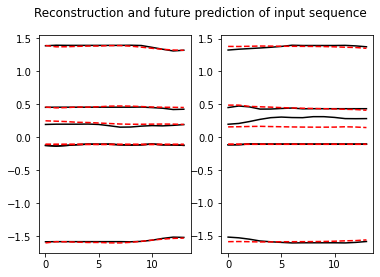

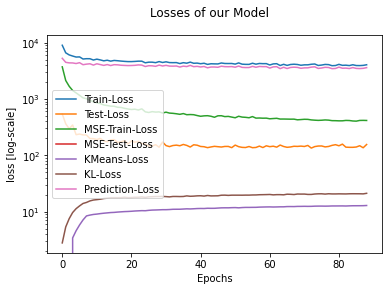

In [20]:
# Evaluate the network

vame.evaluate_model(config, model_name='VAME_prey_model')

In [21]:
# Segment behavior

vame.behavior_segmentation(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=[30])

Using CUDA
GPU active: True
GPU used: GeForce GTX 1080 Ti
Computing latent space for 08_09_2020_16_03_39_miniscope_DG_200617_b_succ 
Computing latent space for 08_08_2020_15_50_40_miniscope_DG_200701_a_succ_noncon 
Computing latent space for 08_13_2020_16_12_01_miniscope_DG_200617_b_succ 
Computing latent space for 12_12_2019_15_08_15_miniscope_MM_191108_a_succ 
Computing latent space for 08_29_2020_16_42_06_miniscope_DG_200617_b_succ 
Computing latent space for 08_31_2020_16_10_12_miniscope_DG_200701_a_succ 
Computing latent space for 09_04_2020_17_14_08_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_55_25_miniscope_DG_200617_b_succ 
Computing latent space for 03_13_2020_14_00_19_miniscope_MM_200129_b_succ 
Computing latent space for 12_03_2019_15_24_04_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_06_2019_14_07_11_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 12_12_2019_15_27_48_miniscope_MM_191108_a_succ 
Computing latent spac

Computing latent space for 08_30_2020_16_24_08_miniscope_DG_200617_b_succ 
Computing latent space for 08_29_2020_16_26_47_miniscope_DG_200617_b_succ 
Computing latent space for 12_12_2019_15_04_45_miniscope_MM_191108_a_succ 
Computing latent space for 08_19_2020_16_33_11_miniscope_DG_200617_b_succ_injured 
Computing latent space for 08_13_2020_15_45_14_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_21_2020_16_24_35_miniscope_DG_200617_b_succ 
Computing latent space for 08_21_2020_15_45_14_miniscope_DG_200701_a_succ 
Computing latent space for 08_31_2020_16_32_34_miniscope_DG_200617_b_succ 
Computing latent space for 08_21_2020_15_42_56_miniscope_DG_200701_a_succ 
Computing latent space for 08_21_2020_16_08_48_miniscope_DG_200617_b_succ 
Computing latent space for 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured 
Computing latent space for 08_08_2020_16_29_56_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_12_08_miniscope_DG_200617_b_succ 
C

Computing latent space for 08_09_2020_16_17_40_miniscope_DG_200617_b_succ 
Computing latent space for 08_19_2020_15_55_28_miniscope_DG_200701_a_succ_injured 
Computing latent space for 09_03_2020_15_54_14_miniscope_DG_200701_a_succ 
Computing latent space for 08_20_2020_15_51_33_miniscope_DG_200701_a_succ 
Computing latent space for 12_09_2019_16_30_00_miniscope_MM_191105_a_succ_nomini 
Computing latent space for 11_12_2019_17_02_59_miniscope_DG_190810_a_succ_nomini 
Computing latent space for 11_13_2019_18_14_36_miniscope_DG_190810_a_succ_nomini 
Computing latent space for 12_09_2019_15_04_06_miniscope_MM_191108_a_succ 
Computing latent space for 08_18_2020_16_28_42_miniscope_DG_200617_b_succ 
Computing latent space for 09_01_2020_16_03_24_miniscope_DG_200701_a_succ 
Computing latent space for 08_14_2020_15_28_27_miniscope_DG_200701_a_succ 
Computing latent space for 09_06_2020_15_31_55_miniscope_DG_200617_b_succ 
Computing latent space for 08_08_2020_15_38_09_miniscope_DG_200701_a_su

Computing latent space for 12_04_2019_16_13_30_miniscope_MM_191108_a_succ_nomini 
Computing latent space for 08_07_2020_16_28_48_miniscope_DG_200701_a_succ 
Computing latent space for 08_10_2020_16_48_58_miniscope_DG_200701_a_succ 
Computing latent space for 08_15_2020_16_05_59_miniscope_DG_200701_a_succ 
Computing latent space for 09_06_2020_15_38_32_miniscope_DG_200617_b_succ 
Computing latent space for 09_04_2020_16_30_05_miniscope_DG_200701_a_succ_injured 
Computing latent space for 08_11_2020_15_22_04_miniscope_DG_200701_a_succ 
Computing latent space for 11_13_2019_18_19_35_miniscope_DG_190810_a_succ_nomini 
Computing latent space for 08_12_2020_16_17_05_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_54_36_miniscope_DG_200617_b_succ 
Computing latent space for 08_11_2020_15_15_22_miniscope_DG_200701_a_succ 
Computing latent space for 09_04_2020_17_00_52_miniscope_DG_200617_b_succ 
Computing latent space for 08_21_2020_16_28_13_miniscope_DG_200617_b_succ 
Com

Computing latent space for 11_14_2019_17_39_46_miniscope_DG_190810_a_succ_nomini 
Computing latent space for 12_07_2019_15_39_33_miniscope_MM_191108_a_succ 
Computing latent space for 12_09_2019_16_46_19_miniscope_MM_191106_a_succ_nomini 
Computing latent space for 08_15_2020_16_22_29_miniscope_DG_200617_b_succ 
Computing latent space for 08_12_2020_16_21_45_miniscope_DG_200617_b_succ 
Computing latent space for 08_16_2020_16_23_16_miniscope_DG_200617_b_succ_injured 
Computing latent space for 12_11_2019_16_56_38_miniscope_MM_191108_a_succ 
Computing latent space for 08_17_2020_15_47_55_miniscope_DG_200701_a_succ 
Computing latent space for 08_12_2020_15_39_17_miniscope_DG_200701_a_succ 
Computing latent space for 12_04_2019_16_07_38_miniscope_MM_191108_a_succ_nomini 
Computing latent space for 08_30_2020_15_44_44_miniscope_DG_200701_a_succ 
Computing latent space for 08_18_2020_16_31_06_miniscope_DG_200617_b_succ 
Computing latent space for 09_08_2020_15_36_13_miniscope_DG_200617_b_su

Segmentation for file 08_31_2020_16_32_34_miniscope_DG_200617_b_succ...
Segmentation for file 08_21_2020_15_42_56_miniscope_DG_200701_a_succ...
Segmentation for file 08_21_2020_16_08_48_miniscope_DG_200617_b_succ...
Segmentation for file 08_13_2020_16_09_18_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_08_2020_16_29_56_miniscope_DG_200617_b_succ...
Segmentation for file 08_12_2020_16_12_08_miniscope_DG_200617_b_succ...
Segmentation for file 08_20_2020_16_40_35_miniscope_DG_200617_b_succ...
Segmentation for file 12_06_2019_14_15_39_miniscope_MM_191105_a_succ_nomini...
Segmentation for file 03_06_2020_16_25_04_miniscope_MM_200129_b_succ...
Segmentation for file 12_09_2019_17_04_36_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 08_06_2020_18_30_31_miniscope_DG_200617_b_succ...
Segmentation for file 09_04_2020_16_49_06_miniscope_DG_200701_a_succ_injured...
Segmentation for file 09_08_2020_15_20_34_miniscope_DG_200701_a_succ...
Segmentation for file 12_10_2019_1

Segmentation for file 12_03_2019_15_08_15_miniscope_MM_191105_a_succ_nomini...
Segmentation for file 12_04_2019_15_56_34_miniscope_MM_191107_a_succ_nomini...
Segmentation for file 09_07_2020_15_35_51_miniscope_DG_200617_b_succ...
Segmentation for file 08_19_2020_16_52_39_miniscope_DG_200617_b_succ...
Segmentation for file 08_17_2020_15_43_31_miniscope_DG_200701_a_succ...
Segmentation for file 08_31_2020_16_42_25_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_07_2020_17_03_26_miniscope_DG_200617_b_succ...
Segmentation for file 12_07_2019_15_24_53_miniscope_MM_191108_a_succ...
Segmentation for file 08_06_2020_18_53_34_miniscope_DG_200617_b_succ...
Segmentation for file 08_17_2020_16_10_15_miniscope_DG_200617_b_succ...
Segmentation for file 09_02_2020_17_24_54_miniscope_DG_200617_b_succ...
Segmentation for file 08_17_2020_16_12_24_miniscope_DG_200617_b_succ...
Segmentation for file 03_13_2020_13_14_07_miniscope_MM_200129_a_succ...
Segmentation for file 08_12_2020_15_32_21_

Segmentation for file 12_04_2019_16_07_38_miniscope_MM_191108_a_succ_nomini...
Segmentation for file 08_30_2020_15_44_44_miniscope_DG_200701_a_succ...
Segmentation for file 08_18_2020_16_31_06_miniscope_DG_200617_b_succ...
Segmentation for file 09_08_2020_15_36_13_miniscope_DG_200617_b_succ_injured...
Segmentation for file 08_12_2020_16_02_32_miniscope_DG_200617_b_succ...
Segmentation for file 03_11_2020_15_58_51_miniscope_MM_200129_a_succ...
Segmentation for file 12_09_2019_16_53_42_miniscope_MM_191106_a_succ_nomini...
Segmentation for file 08_20_2020_16_36_12_miniscope_DG_200617_b_succ...
Segmentation for file 12_07_2019_16_05_30_miniscope_MM_191105_a_succ_nomini...
Segmentation for file 03_10_2020_15_48_48_miniscope_MM_200129_a_succ...
Segmentation for file 03_02_2020_15_50_05_miniscope_MM_200129_a_succ...
Segmentation for file 08_14_2020_15_17_30_miniscope_DG_200701_a_succ_injured...
Segmentation for file 08_31_2020_15_54_51_miniscope_DG_200701_a_succ...
Segmentation for file 09_05

In [22]:
# Quantify behavior

vame.behavior_quantification(config, model_name='VAME_prey_model', cluster_method='kmeans', n_cluster=30)

C:\Users\setup\.conda\envs\vame\lib\site-packages\vame-0.1-py3.7.egg\vame\analysis\behavior_structure.py:56: RuntimeWarning: invalid value encountered in true_divide
